Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years

Administration -- spend on administration in the past few years

Marketing Spend -- spend on Marketing in the past few years

State -- states from which data is collected

Profit  -- profit of each state in the past few years

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded=files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [3]:
import pandas as pd
Startup_Data=pd.read_csv('50_Startups.csv')
Startup_Data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
Startup_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
Startup_Data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
Startup_Data=Startup_Data.drop(['State'],axis=1)
Startup_Data

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [7]:
Startup_Data=Startup_Data.rename(columns={'R&D Spend':'RD_Spend','Marketing Spend':"Marketing_Spend"})
Startup_Data

,RD_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [8]:
Startup_Data.corr()

,RD_Spend,Administration,Marketing_Spend,Profit
RD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


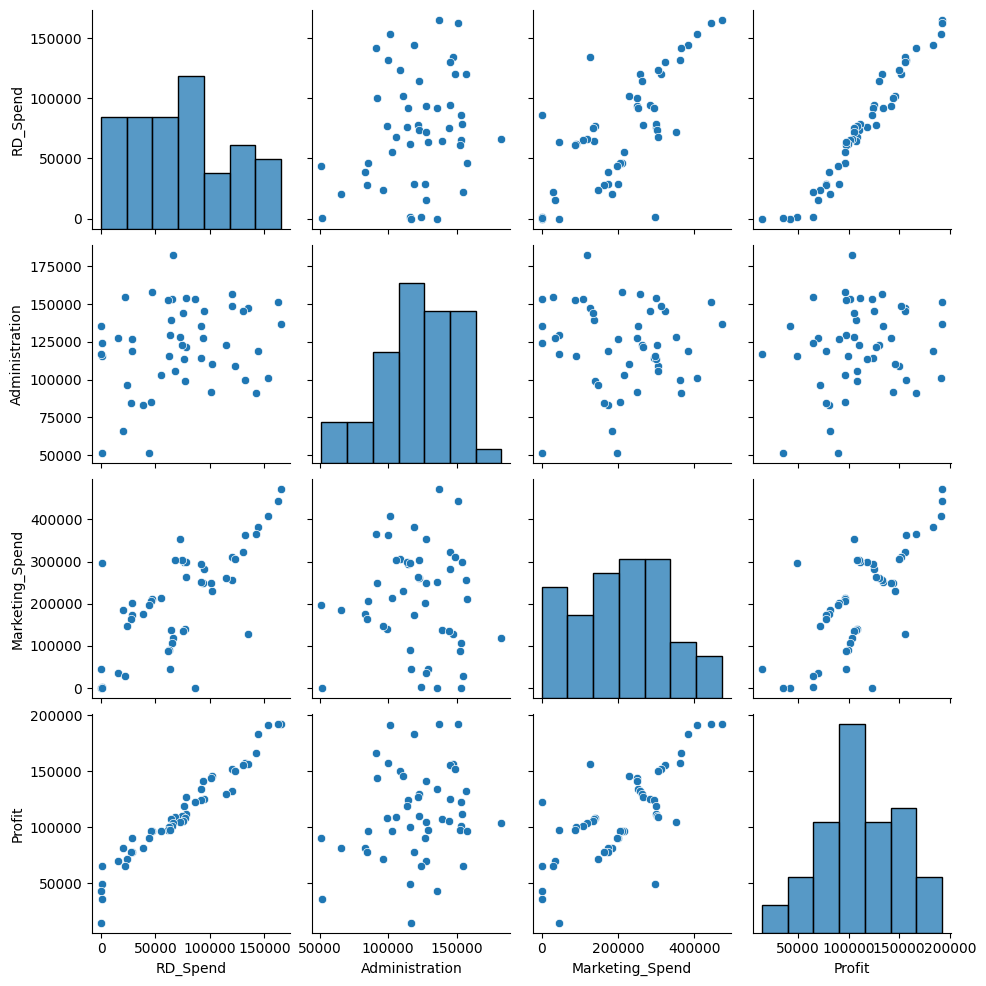

In [9]:
import seaborn as sns
sns.pairplot(Startup_Data)

In [10]:
#Designing model
import statsmodels.formula.api as smf
model=smf.ols('Profit~RD_Spend+Administration+Marketing_Spend',data=Startup_Data).fit()

In [11]:
model.params

Intercept          50122.192990
RD_Spend               0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [13]:
# Finding tvalues and pvalues
import numpy as np
model.tvalues , np.round(model.pvalues,5)

(Intercept           7.626218
 RD_Spend           17.846374
 Administration     -0.525507
 Marketing_Spend     1.655077
 dtype: float64,
 Intercept          0.00000
 RD_Spend           0.00000
 Administration     0.60176
 Marketing_Spend    0.10472
 dtype: float64)

In [14]:
# Finding rsquared values
model.rsquared , model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

Build SLR and MLR models for insignificant variables 'Administration' and 'Marketing_Spend'.

Also find their tvalues and pvalues

In [16]:
slr_a=smf.ols("Profit~Administration",data=Startup_Data).fit()
slr_a.tvalues , slr_a.pvalues  # Administration has in-significant pvalue

(Intercept         3.040044
 Administration    1.419493
 dtype: float64,
 Intercept         0.003824
 Administration    0.162217
 dtype: float64)

In [17]:
slr_m=smf.ols("Profit~Marketing_Spend",data=Startup_Data).fit()
slr_m.tvalues , slr_m.pvalues  # Marketing_Spend has significant pvalue

(Intercept          7.808356
 Marketing_Spend    7.802657
 dtype: float64,
 Intercept          4.294735e-10
 Marketing_Spend    4.381073e-10
 dtype: float64)

In [18]:
mlr_am=smf.ols("Profit~Administration+Marketing_Spend",data=Startup_Data).fit()
mlr_am.tvalues , mlr_am.pvalues

(Intercept          1.142741
 Administration     2.467779
 Marketing_Spend    8.281039
 dtype: float64,
 Intercept          2.589341e-01
 Administration     1.729198e-02
 Marketing_Spend    9.727245e-11
 dtype: float64)

Model Validation

Collinearity

In [19]:
# Calculate VIF = 1/(1-Rsquare) for all independent variables
rsq_r=smf.ols('RD_Spend~Administration+Marketing_Spend',data=Startup_Data).fit().rsquared
vif_r=1/(1-rsq_r)
rsq_a=smf.ols('Administration~RD_Spend+Marketing_Spend',data=Startup_Data).fit().rsquared
vif_a=1/(1-rsq_a)
rsq_m=smf.ols('Marketing_Spend~RD_Spend+Administration',data=Startup_Data).fit().rsquared
vif_m=1/(1-rsq_m)

In [20]:
Data=pd.DataFrame({'Variables':['RD_Spend','Administration','Marketing_Spend'],'VIF':[vif_r,vif_a,vif_m]})
Data

,Variables,VIF
0,RD_Spend,2.468903
1,Administration,1.175091
2,Marketing_Spend,2.326773


From above the P Value of Marketing spend is above 0.05 and its VIF also high so we can drop Administration since its not a good variable for Y prediction.But we will check for some other models also to verify this.

Residual Analysis

In [21]:
model.resid

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

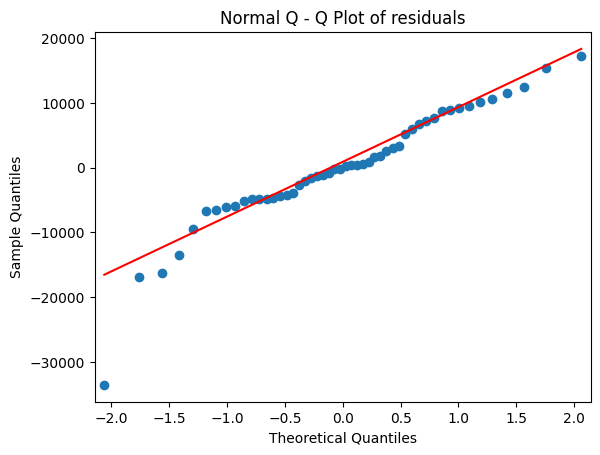

In [22]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q - Q Plot of residuals")
plt.show()

In [23]:
import numpy as np
list(np.where(model.resid>20))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45])]

Residual plot for Homoscadacity

In [24]:
def get_standardized_values(val):
  return (val-val.mean())/val.std()

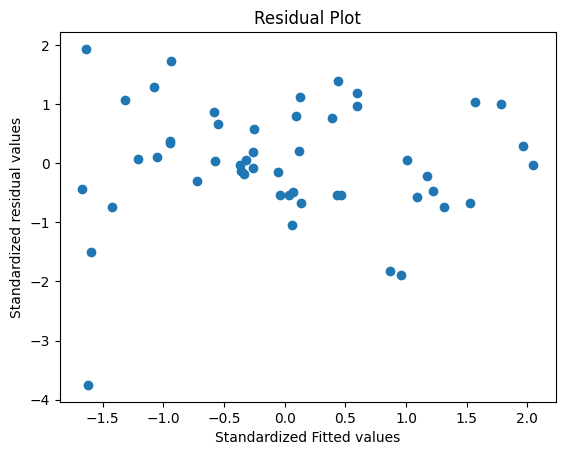

In [25]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

Residual Vs Regressors

eval_env: 1


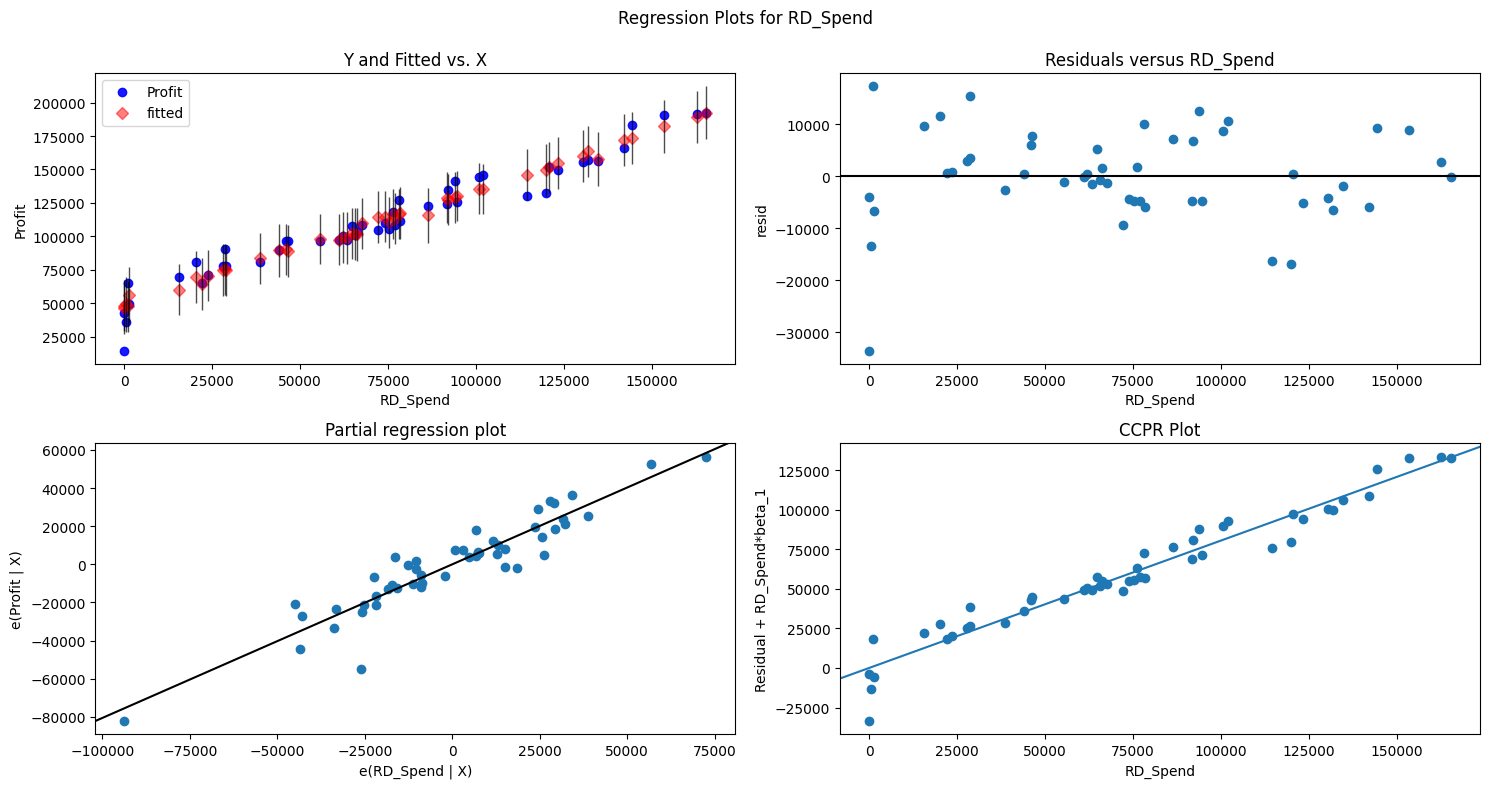

In [28]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD_Spend", fig=fig)
plt.show()

eval_env: 1


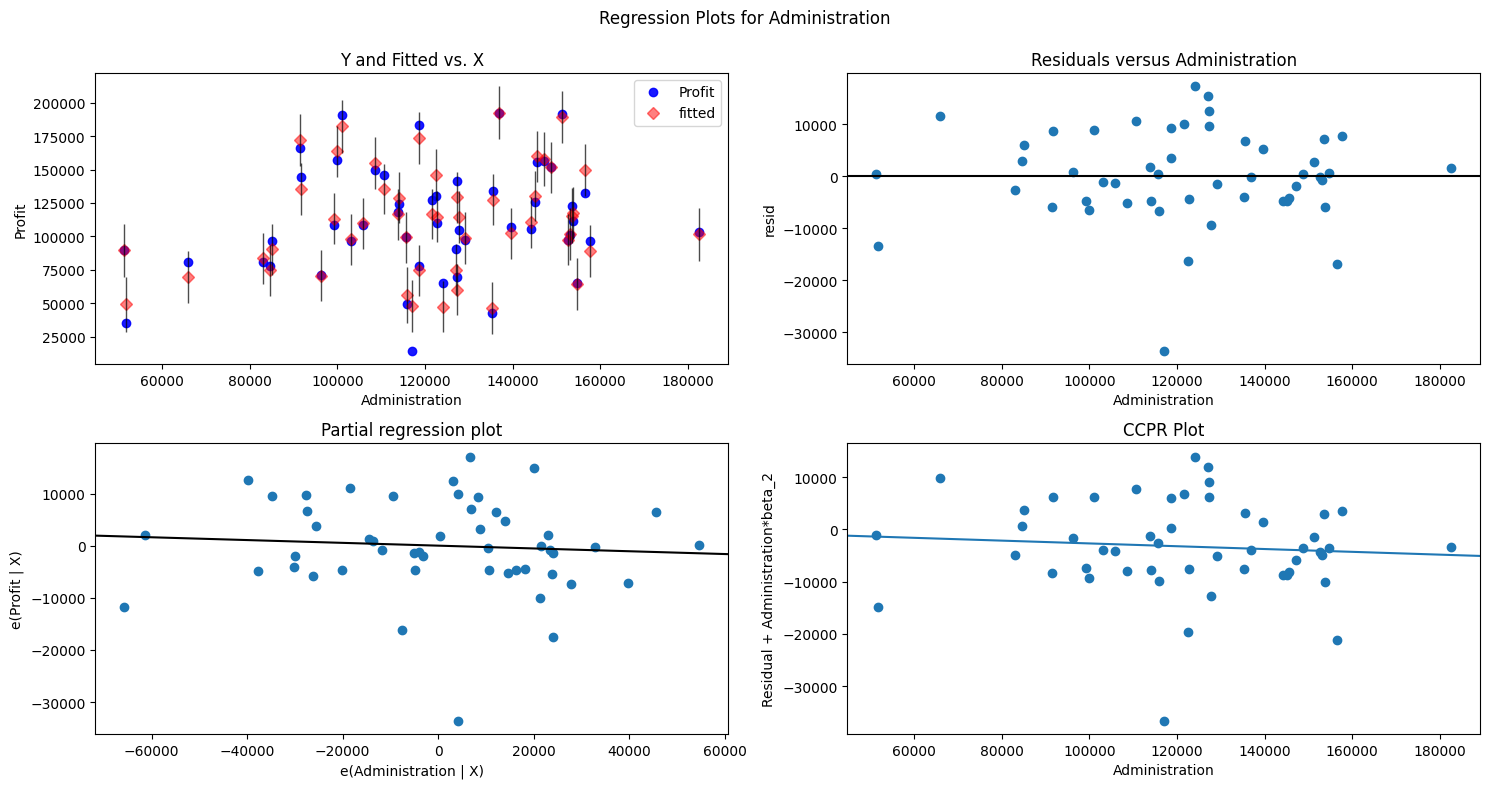

In [29]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

eval_env: 1


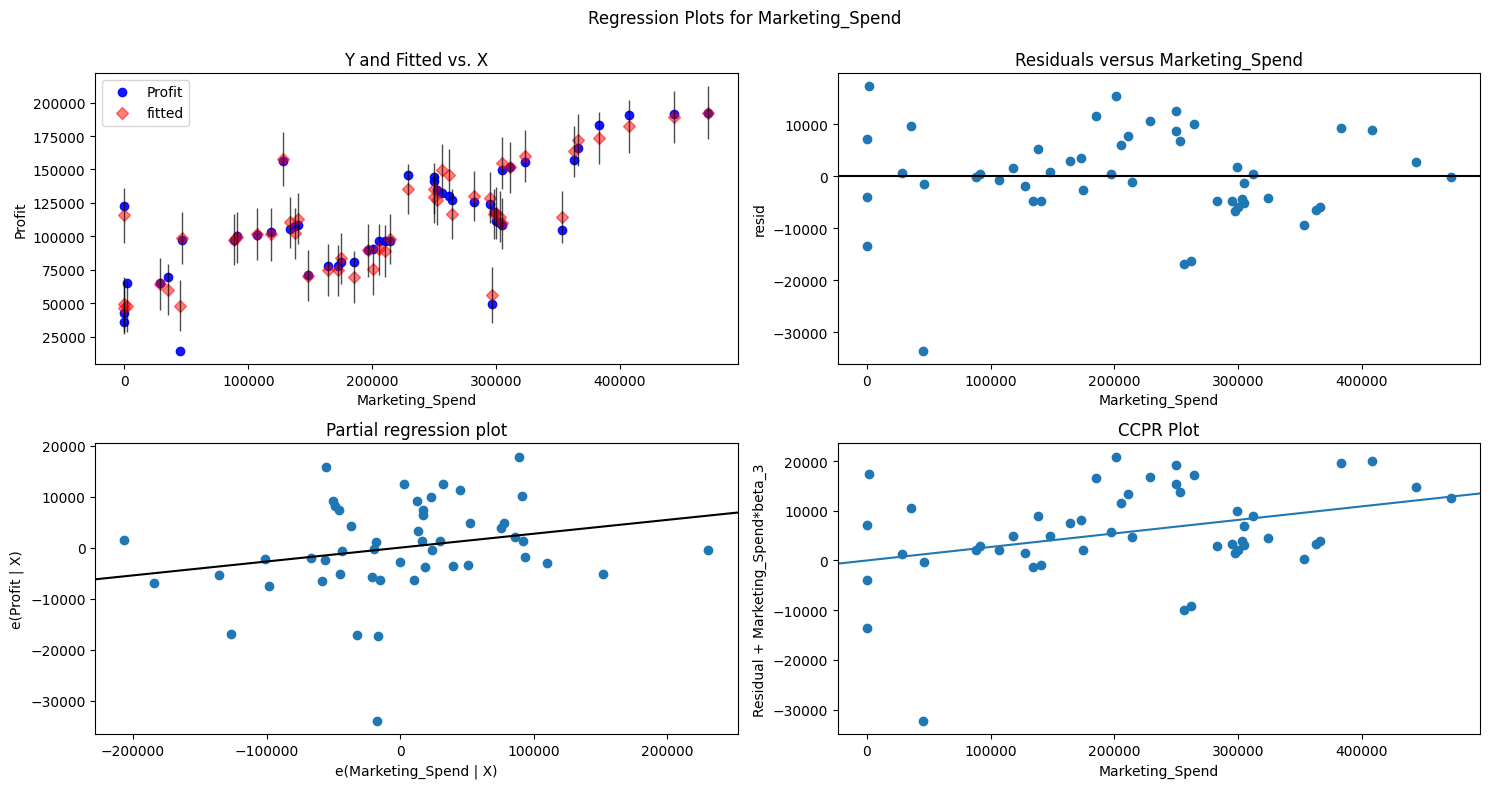

In [30]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig=fig)
plt.show()

So from above all inferences and plots we can conclude that ADMINISTRAION is not a good factor for prediction. So, we can drop it or ignore it. Because Administration p-value is high & r-sqrd value is less and partial regression plot slope is very less.

To find Outliers

Lets check cook distance

In [35]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

In [36]:
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

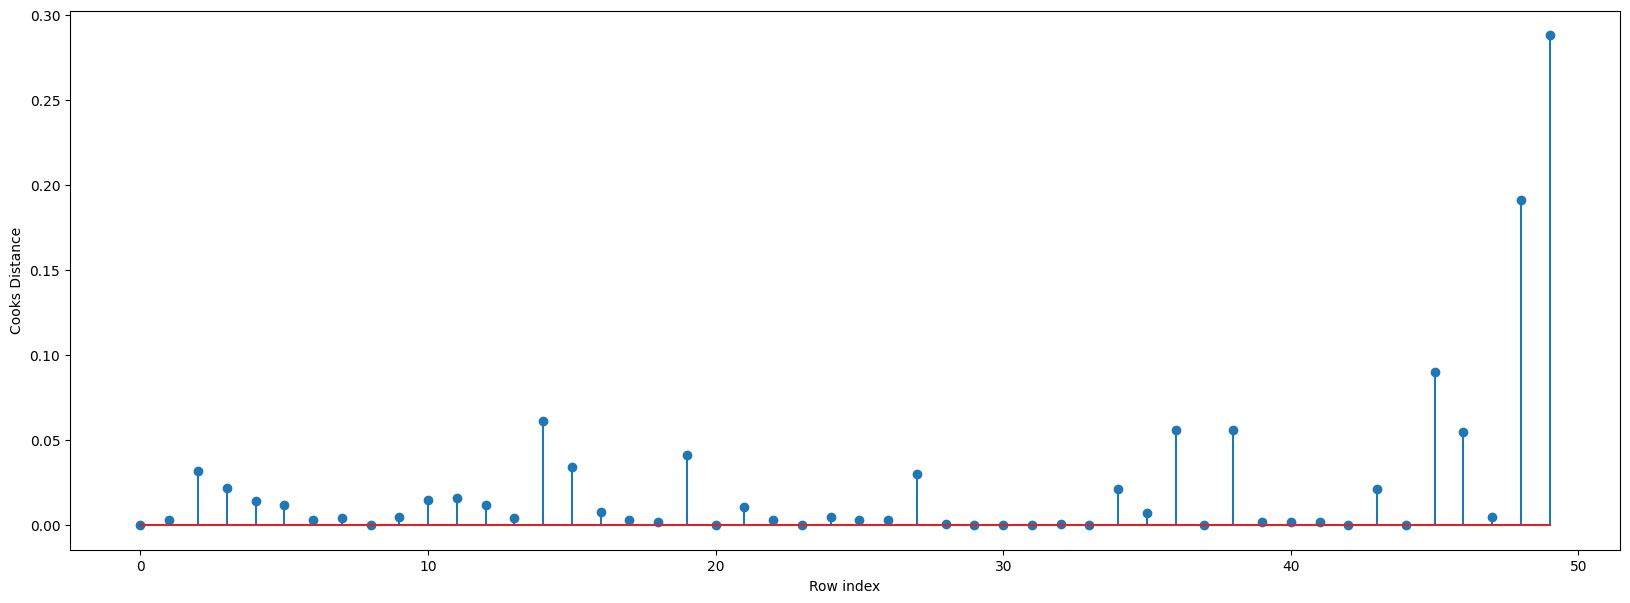

In [37]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(Startup_Data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [38]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

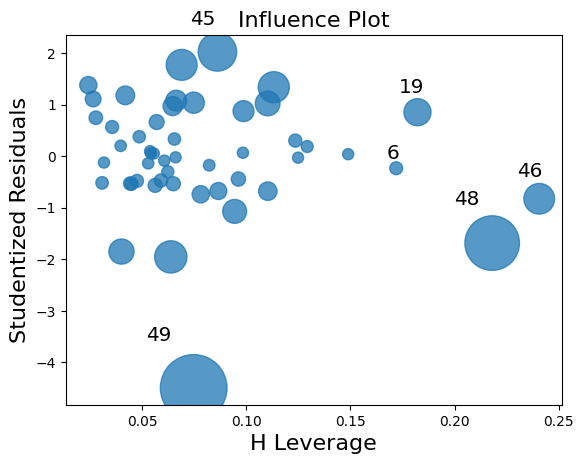

In [39]:
#high influence point
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [40]:
k = Startup_Data.shape[1]
n = Startup_Data.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.30000000000000004

In [41]:
Startup_Data[Startup_Data.index.isin([49])]

,RD_Spend,Administration,Marketing_Spend,Profit
49,0.0,116983.8,45173.06,14681.4


Improving model

In [42]:
from google.colab import files
uploaded=files.upload()

Saving 50_Startups.csv to 50_Startups (1).csv


In [43]:
Startup_Data=pd.read_csv('50_Startups.csv')
Startup_Data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [46]:
Startup_Data=Startup_Data.rename(columns={'R&D Spend':'RD_Spend','Marketing Spend':"Marketing_Spend"})
Startup_Data

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [47]:
NEW_DATA=Startup_Data.drop(Startup_Data.index[[49]],axis=0).reset_index(drop=True)
NEW_DATA

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [48]:
final_mlr = smf.ols("Profit~RD_Spend+Administration+Marketing_Spend",data=NEW_DATA).fit()

In [49]:
(final_mlr.rsquared,final_mlr.aic)

(0.9613162435129847, 1020.5652974526367)

Model Prediction

In [53]:
pre_data=pd.DataFrame({'RD_Spend':50000,"Administration":90000,"Marketing_Spend":130000},index=[0])
pre_data

,RD_Spend,Administration,Marketing_Spend
0,50000,90000,130000


In [54]:
final_mlr.predict(pre_data)

0    92814.781086
dtype: float64

In [55]:
pred=final_mlr.predict(NEW_DATA)
pred

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

table containing R^2 value for each prepared model

In [56]:
r2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_mlr.rsquared]}
table=pd.DataFrame(r2)

In [57]:
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316
